In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_parquet('data/hurdat2.parquet')

In [9]:
# Filter data to start from 1972
df_filtered = df[(df['Year'] >= 1972) & (df['MaxWind'] > 0)]

In [10]:
# Perform linear regression on intensity data (MaxWindSpeed)
slope, intercept, r_value, p_value, std_err = linregress(df_filtered['Year'], df_filtered['MaxWind'])

# Print results
print(f"Slope: {slope}")
print(f"P-value: {p_value}")

# Check significance
if p_value > 0.05:
    print("The slope is not significantly different from zero (consistent with no trend).")
else:
    print("The slope is significantly different from zero (indicating a trend).")

Slope: 0.1616085809964577
P-value: 6.829648943087158e-52
The slope is significantly different from zero (indicating a trend).


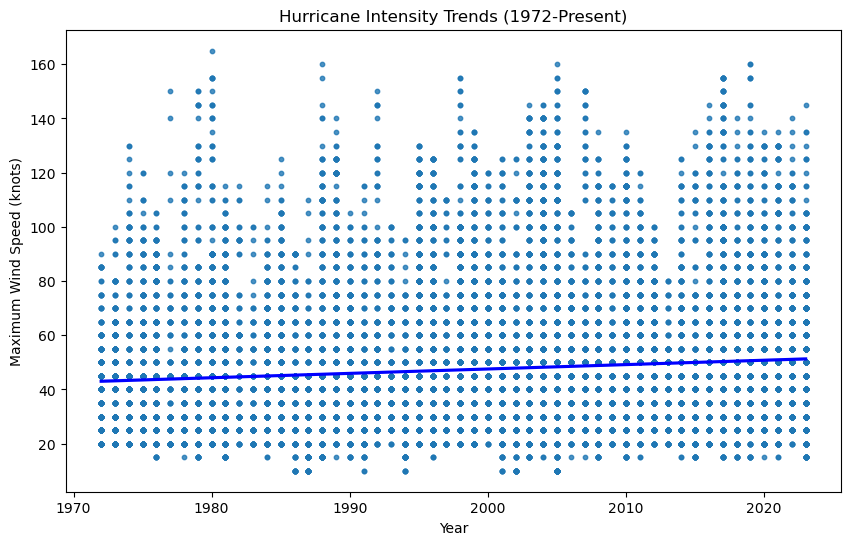

In [11]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='MaxWind', data=df_filtered, scatter_kws={"s": 10}, line_kws={"color": "blue"})

# Customize plot
plt.xlabel('Year')
plt.ylabel('Maximum Wind Speed (knots)')
plt.title('Hurricane Intensity Trends (1972-Present)')
plt.show()